In [97]:
import warnings
warnings.filterwarnings('ignore')
%run './LoBModel.py'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy.stats import boxcox
import statsmodels.api as sm
plt.style.use('fivethirtyeight')


plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12

%matplotlib inline

In [135]:
## EDA utilities
def spearman(frame, features=[], target='y'):
    """
    plots spearman correlation of each features with target
    """
    spr = pd.DataFrame()
    print(features)
    spr['feature'] = features
    spr['spearman'] = [frame[f].corr(frame[target], 'spearman') for f in features]
    spr = spr.sort_values('spearman')
    plt.figure(figsize=(6, 0.25*len(features)))
    sns.barplot(data=spr, y='feature', x='spearman', orient='h')
    
    
def plot_corr_heatmap(X, title="Corr Heatmap"):
    X_corr = X.corr()
    plt.figure(figsize=(12,7))
    # Add title
    plt.title(title)
    mask = np.zeros_like(X_corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(mask=mask, data=X_corr, annot=True, cmap=cmap)
    
def pairplot_with_target(X, features, target):
    def pairplot(x, y, **kwargs):
        ax = plt.gca()
        ts = pd.DataFrame({'time': x, 'val': y})
        ts = ts.groupby('time').mean()
        ts.plot(ax=ax)
        plt.xticks(rotation=90)
    f = pd.melt(X, id_vars=[target], value_vars=features)
    g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False, size=5)
    g = g.map(pairplot, "value", target)


In [84]:
msft_lob = pd.concat([pd.read_csv('../data/lob/MSFT_quotes.csv'),
                     pd.read_csv('../data/lob/MSFT_quotes 2.csv'),
                     pd.read_csv('../data/lob/MSFT_quotes 3.csv'),
                     pd.read_csv('../data/lob/MSFT_quotes 4.csv')], axis=0)

aapl_lob = pd.concat([pd.read_csv('../data/lob/AAPL_quotes.csv'),
                     pd.read_csv('../data/lob/AAPL_quotes 2.csv'),
                     pd.read_csv('../data/lob/AAPL_quotes 3.csv'),
                     pd.read_csv('../data/lob/AAPL_quotes 4.csv')], axis=0)

fb_lob = pd.concat([pd.read_csv('../data/lob/FB_quotes.csv'),
                     pd.read_csv('../data/lob/FB_quotes 2.csv'),
                     pd.read_csv('../data/lob/FB_quotes 3.csv')], axis=0)

amzn_lob = pd.concat([pd.read_csv('../data/lob/AMZN_quotes.csv'),
                     pd.read_csv('../data/lob/AMZN_quotes 2.csv'),
                     pd.read_csv('../data/lob/AMZN_quotes 3.csv')], axis=0)

In [136]:
msft_vol_model_1m = LoBVolModel(msft_lob)

In [139]:
aapl_vol_model_1m = LoBVolModel(aapl_lob)

In [140]:
fb_vol_model_1m = LoBVolModel(fb_lob)

In [141]:
amzn_vol_model_1m = LoBVolModel(amzn_lob)

### EDA

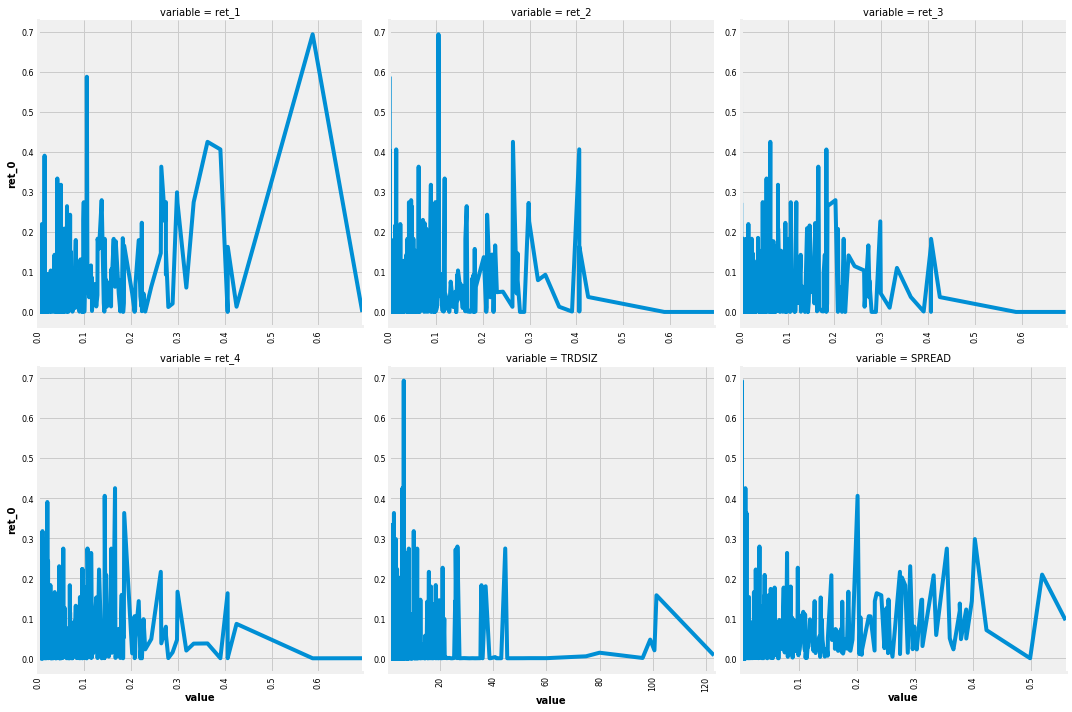

In [137]:
pairplot_with_target(msft_vol_model_1m.X, ['ret_1', 'ret_2', 'ret_3', 'ret_4', 'TRDSIZ', 'SPREAD'],'ret_0')

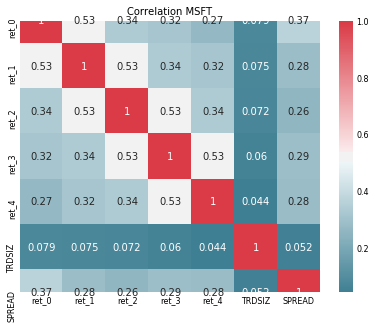

In [142]:
X_corr = msft_vol_model_1m.X[['ret_0', 'ret_1', 'ret_2', 'ret_3', 'ret_4', 'TRDSIZ', 'SPREAD']].corr()
plt.figure(figsize=(6,5))
plt.title('Correlation MSFT')
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(data=X_corr, annot=True, cmap=cmap)
plt.savefig('corr_heat_msft.png')

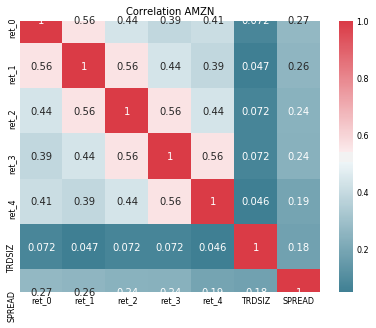

In [143]:
X_corr = amzn_vol_model_1m.X[['ret_0', 'ret_1', 'ret_2', 'ret_3', 'ret_4', 'TRDSIZ', 'SPREAD']].corr()
plt.figure(figsize=(6,5))
plt.title('Correlation AMZN')
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(data=X_corr, annot=True, cmap=cmap)
plt.savefig('corr_heat_amzn.png')

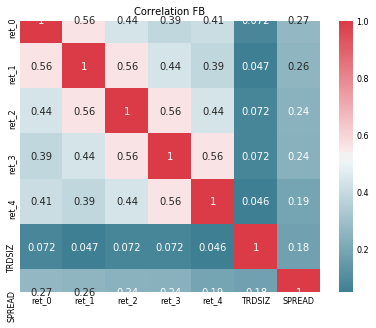

In [144]:
X_corr = amzn_vol_model_1m.X[['ret_0', 'ret_1', 'ret_2', 'ret_3', 'ret_4', 'TRDSIZ', 'SPREAD']].corr()
plt.figure(figsize=(6,5))
plt.title('Correlation FB')
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(data=X_corr, annot=True, cmap=cmap)
plt.savefig('corr_heat_fb.png')

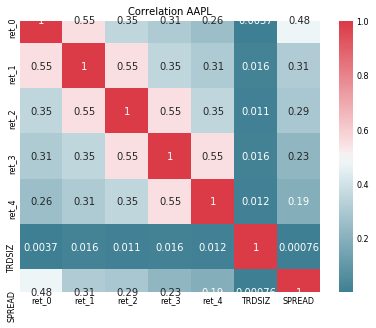

In [145]:
X_corr = aapl_vol_model_1m.X[['ret_0', 'ret_1', 'ret_2', 'ret_3', 'ret_4', 'TRDSIZ', 'SPREAD']].corr()
plt.figure(figsize=(6,5))
plt.title('Correlation AAPL')
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(data=X_corr, annot=True, cmap=cmap)
plt.savefig('corr_heat_aapl.png')

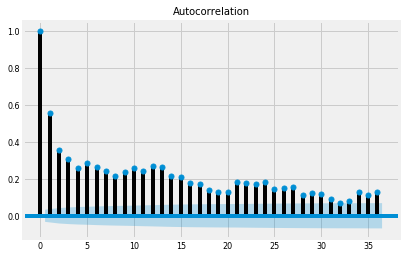

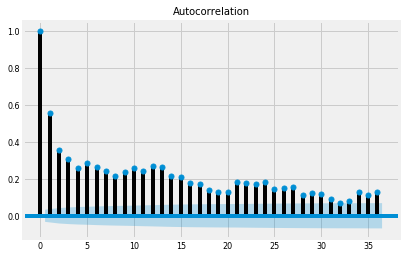

In [148]:
sm.graphics.tsa.plot_acf(aapl_vol_model_1m.X['ret_0'])

## Modelling

In [85]:
msft_results = msft_vol_model_1m.fit()

In [98]:
aapl_results = aapl_vol_model_1m.fit()

In [99]:
fb_results = fb_vol_model_1m.fit()

In [115]:
amzn_results = amzn_vol_model_1m.fit()

In [101]:
msft_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  ret_0   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     114.6
Date:                Sun, 29 Sep 2019   Prob (F-statistic):          1.57e-260
Time:                        15:57:03   Log-Likelihood:                 5294.8
No. Observations:                2702   AIC:                        -1.056e+04
Df Residuals:                    2687   BIC:                        -1.047e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0019      0.001      2.152      0.031       0.000       0.004
ret_0          0.3943      0.019     20.384      0.000       0.356       0.432
ret_1         -0.0404      0.021     -1.959      0.050      -0.081    3.07e-05
ret_2          0.0828      0.021      4.015      0.000       0.042       0.123
ret_3         -0.0521      0.021     -2.515      0.012      -0.093      -0.011
ret_4          0.1297      0.021      6.291      0.000       0.089       0.170
ret_5          0.0010      0.021      0.048      0.962      -0.040       0.042
ret_6         -0.0244      0.021     -1.170      0.242      -0.065       0.016
ret_7          0.1177      0.021      5.666      0.000       0.077       0.158
ret_8          0.0095      0.021      0.460      0.646      -0.031       0.050
ret_9         -0.0136      0.021     -0.659      0.510      -0.054       0.027
ret_10         0.0658      0.021      3.196      0.001       0.025       0.106
ret_11         0.0371      0.019      1.954      0.051      -0.000       0.074
TRDSIZ     -6.962e-05      0.000     -0.676      0.499      -0.000       0.000
SPREAD         0.1488      0.015      9.637      0.000       0.119       0.179
==============================================================================
Omnibus:                     2813.347   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           320837.613
Skew:                           4.898   Prob(JB):                         0.00
Kurtosis:                      55.477   Cond. No.                         399.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [116]:
amzn_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  ret_0   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     92.22
Date:                Sun, 29 Sep 2019   Prob (F-statistic):          3.36e-201
Time:                        16:02:52   Log-Likelihood:                 2628.7
No. Observations:                1883   AIC:                            -5227.
Df Residuals:                    1868   BIC:                            -5144.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0015      0.003     -0.493      0.622      -0.007       0.004
ret_0          0.3571      0.023     15.569      0.000       0.312       0.402
ret_1          0.0574      0.024      2.356      0.019       0.010       0.105
ret_2          0.0104      0.024      0.425      0.671      -0.038       0.058
ret_3          0.0851      0.024      3.484      0.001       0.037       0.133
ret_4          0.0944      0.024      3.860      0.000       0.046       0.142
ret_5          0.0034      0.025      0.137      0.891      -0.045       0.051
ret_6          0.0572      0.025      2.332      0.020       0.009       0.105
ret_7          0.0197      0.024      0.805      0.421      -0.028       0.068
ret_8          0.0360      0.024      1.478      0.140      -0.012       0.084
ret_9         -0.0071      0.024     -0.289      0.773      -0.055       0.041
ret_10        -0.0066      0.024     -0.269      0.788      -0.054       0.041
ret_11         0.0899      0.023      3.939      0.000       0.045       0.135
TRDSIZ         0.0039      0.002      2.282      0.023       0.001       0.007
SPREAD         0.1221      0.023      5.274      0.000       0.077       0.167
==============================================================================
Omnibus:                     1430.578   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            54611.127
Skew:                           3.177   Prob(JB):                         0.00
Kurtosis:                      28.606   Cond. No.                         42.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [103]:
fb_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  ret_0   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     117.2
Date:                Sun, 29 Sep 2019   Prob (F-statistic):          9.22e-240
Time:                        15:57:03   Log-Likelihood:                 839.33
No. Observations:                1780   AIC:                            -1649.
Df Residuals:                    1765   BIC:                            -1566.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0075      0.006      1.209      0.227      -0.005       0.020
ret_0          0.5970      0.029     20.872      0.000       0.541       0.653
ret_1         -0.4615      0.032    -14.351      0.000      -0.525      -0.398
ret_2          0.3822      0.034     11.170      0.000       0.315       0.449
ret_3         -0.2905      0.035     -8.204      0.000      -0.360      -0.221
ret_4          0.2723      0.036      7.500      0.000       0.201       0.344
ret_5         -0.1605      0.037     -4.378      0.000      -0.232      -0.089
ret_6          0.1647      0.037      4.492      0.000       0.093       0.237
ret_7          0.0123      0.036      0.342      0.732      -0.058       0.083
ret_8          0.0509      0.035      1.468      0.142      -0.017       0.119
ret_9          0.0114      0.033      0.349      0.727      -0.053       0.075
ret_10         0.0205      0.029      0.698      0.485      -0.037       0.078
ret_11        -0.0093      0.023     -0.407      0.684      -0.054       0.036
TRDSIZ        -0.0041      0.001     -3.122      0.002      -0.007      -0.002
SPREAD         0.7683      0.065     11.823      0.000       0.641       0.896
==============================================================================
Omnibus:                     4499.501   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         68458417.312
Skew:                          26.729   Prob(JB):                         0.00
Kurtosis:                     962.259   Cond. No.                         116.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [104]:
aapl_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  ret_0   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     164.7
Date:                Sun, 29 Sep 2019   Prob (F-statistic):               0.00
Time:                        15:57:03   Log-Likelihood:                 7389.3
No. Observations:                3557   AIC:                        -1.475e+04
Df Residuals:                    3542   BIC:                        -1.466e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0009      0.001      1.139      0.255      -0.001       0.002
ret_0          0.3803      0.017     21.947      0.000       0.346       0.414
ret_1         -0.0177      0.018     -0.990      0.322      -0.053       0.017
ret_2          0.0638      0.018      3.551      0.000       0.029       0.099
ret_3         -0.0386      0.018     -2.153      0.031      -0.074      -0.003
ret_4          0.1052      0.018      5.864      0.000       0.070       0.140
ret_5          0.0006      0.018      0.032      0.974      -0.035       0.036
ret_6          0.0290      0.018      1.610      0.107      -0.006       0.064
ret_7         -0.0235      0.018     -1.308      0.191      -0.059       0.012
ret_8          0.0397      0.018      2.214      0.027       0.005       0.075
ret_9          0.0567      0.018      3.166      0.002       0.022       0.092
ret_10        -0.0174      0.018     -0.969      0.333      -0.053       0.018
ret_11         0.0597      0.016      3.663      0.000       0.028       0.092
TRDSIZ         0.0001      0.000      1.120      0.263      -0.000       0.000
SPREAD         0.1954      0.013     15.293      0.000       0.170       0.220
==============================================================================
Omnibus:                     3703.146   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           623733.564
Skew:                           4.773   Prob(JB):                         0.00
Kurtosis:                      67.167   Cond. No.                         308.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

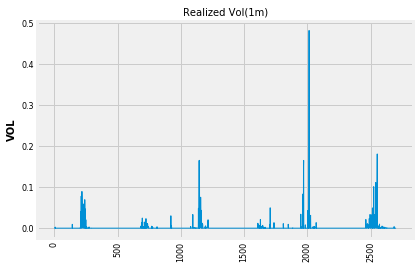

In [106]:
plt.figure(figsize=(6,4))
msft_vol_model_1m.plot_series('VOL',  plt, 'Realized Vol(1m)',)

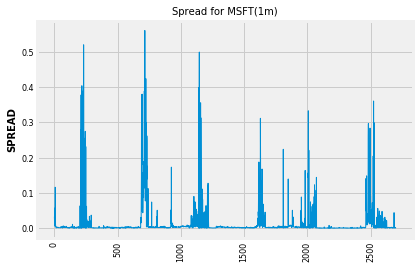

In [128]:
plt.figure(figsize=(6,4))
msft_vol_model_1m.plot_series('SPREAD', plt, 'Spread for MSFT(1m)',)
plt.savefig('spread_msft.png')

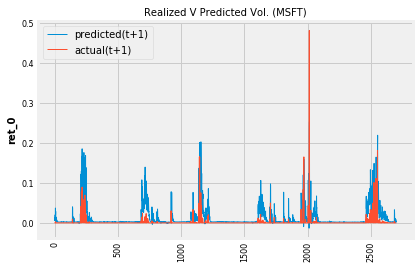

In [126]:
plt.figure(figsize=(6, 4))
msft_vol_model_1m.plot_predictions(plt, title='Realized V Predicted Vol. (MSFT)')
plt.savefig('pred_msft.png')

In [109]:
msft_vol_model_1m.mae()

0.0118324484253224

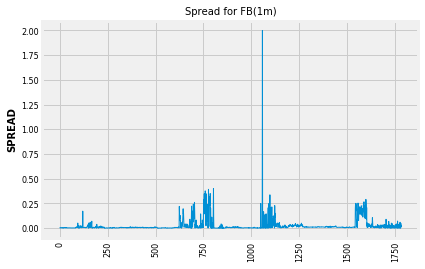

In [129]:
plt.figure(figsize=(6,4))
fb_vol_model_1m.plot_series('SPREAD', plt, 'Spread for FB(1m)',)
plt.savefig('spread_fb.png')

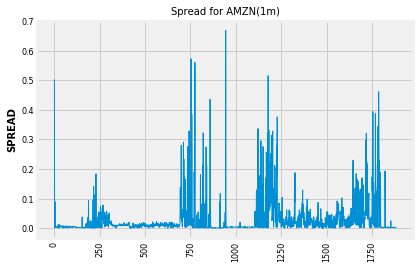

In [130]:
plt.figure(figsize=(6,4))
amzn_vol_model_1m.plot_series('SPREAD', plt, 'Spread for AMZN(1m)',)
plt.savefig('spread_amzn.png')

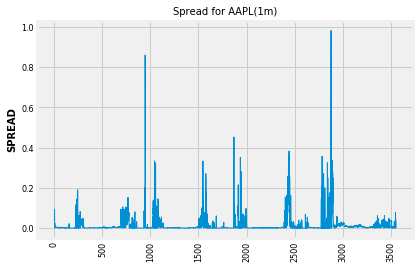

In [131]:
plt.figure(figsize=(6,4))
aapl_vol_model_1m.plot_series('SPREAD', plt, 'Spread for AAPL(1m)',)
plt.savefig('spread_aapl.png')

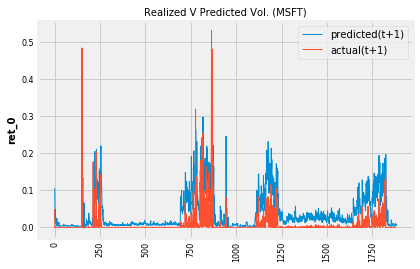

In [132]:
plt.figure(figsize=(6, 4))
amzn_vol_model_1m.plot_predictions(plt, title='Realized V Predicted Vol. (MSFT)')
plt.savefig('pred_amzn.png')

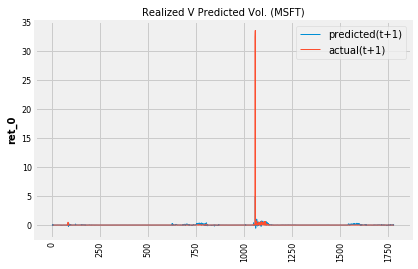

In [133]:
plt.figure(figsize=(6, 4))
fb_vol_model_1m.plot_predictions(plt, title='Realized V Predicted Vol. (MSFT)')
plt.savefig('pred_fb.png')

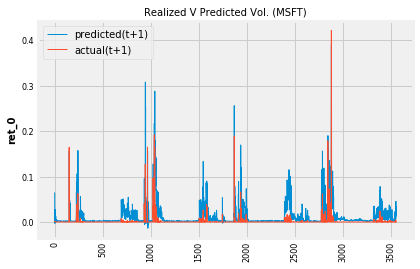

In [134]:
plt.figure(figsize=(6, 4))
aapl_vol_model_1m.plot_predictions(plt, title='Realized V Predicted Vol. (MSFT)')
plt.savefig('pred_aapl.png')

In [121]:
msft_vol_model_1m.mae()

0.0118324484253224

In [122]:
aapl_vol_model_1m.mae()

0.010896400765347576

In [123]:
fb_vol_model_1m.mae()

0.06421164525747138

In [124]:
amzn_vol_model_1m.mae()

0.03492777696078018